In [3]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
#import cv2

In [4]:
dataset_path = 'Deteksi Muka/DataSet/dataset'

# Path ke subdirektori 'train', 'val', dan 'test'
train_path = os.path.join(dataset_path, 'train')
val_path = os.path.join(dataset_path, 'validation')
test_path = os.path.join(dataset_path, 'test')

In [5]:
import random
from tensorflow.keras.preprocessing.image import load_img

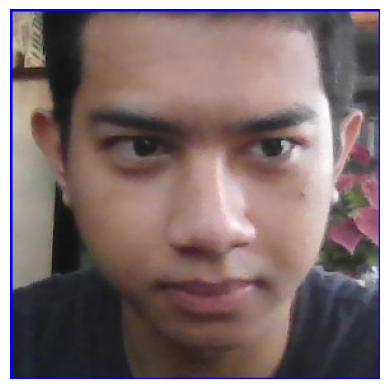

In [6]:
# Pilih secara acak salah satu subdirektori dari 'train'
person_dirs = os.listdir(test_path)
random_person_dir = random.choice(person_dirs)

# Path ke salah satu gambar acak dari subdirektori yang dipilih
random_person_path = os.path.join(test_path, random_person_dir)
random_image = random.choice(os.listdir(random_person_path))
random_image_path = os.path.join(random_person_path, random_image)

# Muat gambar menggunakan matplotlib
image = load_img(random_image_path)

# Tampilkan gambar
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
# Set parameter untuk generator
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk data pelatihan
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk data validasi
val_generator = datagen.flow_from_directory(
    val_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk data pengujian
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 420 images belonging to 7 classes.
Found 210 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [8]:
from tensorflow.keras.models import Sequential
model = Sequential()

# Tambahkan lapisan konvolusi dan pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())
num_classes = 7
# Tambahkan lapisan-lapisan Dense untuk klasifikasi
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10
14/14 [==============================] - 30s 2s/step - loss: 1.5592 - accuracy: 0.5310 - val_loss: 0.4089 - val_accuracy: 0.7905
Epoch 2/10
14/14 [==============================] - 28s 2s/step - loss: 0.2140 - accuracy: 0.9381 - val_loss: 0.1623 - val_accuracy: 0.8571
Epoch 3/10
14/14 [==============================] - 24s 2s/step - loss: 0.0191 - accuracy: 0.9905 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 24s 2s/step - loss: 2.2179e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 3.9676e-05 - accuracy: 1.0000 - val_loss: 2.5139e-04 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 23s 2s/step - loss: 1.2977e-05 - accuracy: 1.0000 - val_loss: 1.0398e-04 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 26s 2s/step - loss: 5.5978e-06 - accuracy: 1.0000 - val_loss: 6.2531e-05 - val_accuracy:

In [11]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

3/3 [==============================] - 1s 163ms/step - loss: 0.0172 - accuracy: 1.0000
Test accuracy: 1.0


In [12]:
#predictions = model.predict(test_generator)

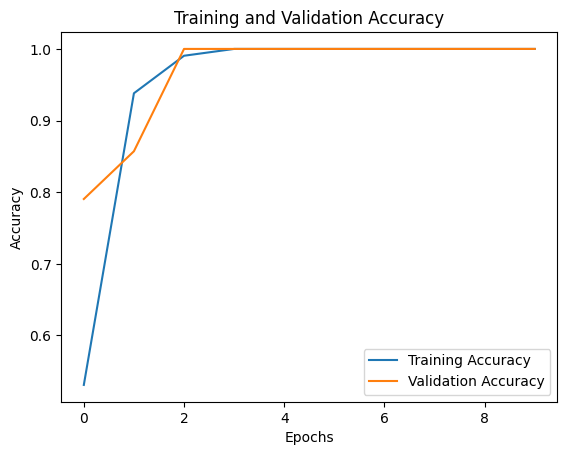

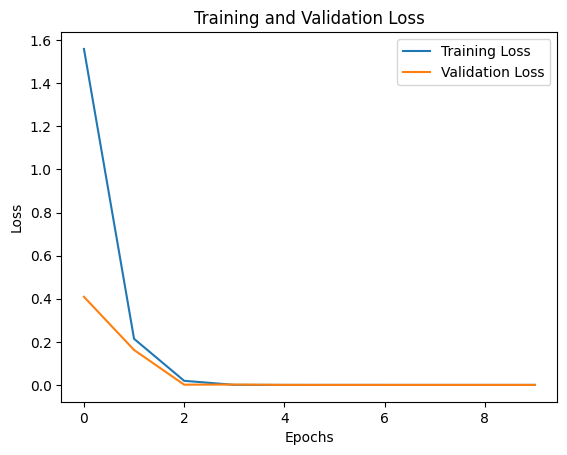

3/3 [==============================] - 1s 141ms/step - loss: 0.0172 - accuracy: 1.0000
Test Loss: 0.017170725390315056
Test Accuracy: 1.0


In [13]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

In [14]:
# Menyimpan model ke file H5
model.save('model_cnn.h5')
